# Hypothesis Testing

In this section we will talk about the process of using data to test a hypothesis. 

We can roughly break down the process of hypothesis testing into the following steps:

1. State relevant null and alternative hypotheses
2. State the test statistic
3. Derive the distribution of the test statistic under the null hypothesis
4. Select significance level ($\alpha$) at which the null hypothesis will be rejected
5. Compute an observed test statistic from the data
6. Calculate a p-value and decide whether to reject the appropriate hypothesis

Let's go through these steps one by one, and look at what each of these steps looks like for a simple coin flip example.

## 1. State relevant null and alternative hypotheses
When constructing an analysis, we should be careful to state the _null_ and _alternative_ hypotheses. Typically, the _null hypothesis_ ($H_o$) refers to a statement or default position that there is no relationship between two phenomena, that there is no signal, or that our current models describe the data well. The _alternative_ ($H_a$) hypothesis usually describes the opposite: that there is a relationship between two phenomena, that there is a signal, or that our models to NOT describe the data well. Here are some example pairs of hypotheses you might encounter in IceCube:

- $H_o$: Neutrino event arrival directions are not correlated with the positions of blazars

- $H_a$: Neutrino event arrival directions are correlated with the positions of blazars



- $H_o$: A 3-flavor oscillation model describes our data well

- $H_a$: The data is inconsistent with the 3-flavor model



- $H_o$: The prompt component of the atmospheric neutrino spectrum is zero

- $H_a$: The prompt component of the atmospheric neutrino spectrum is nonzero


For this talk, let's consider a simple example: We want to know if a coin flip is "fair" in the sense that the $P(heads)=P(tails)=1/2$. In this case, we can set up our hypotheses like so:

- $H_o$: The coin is fair, $P(heads)=1/2$

- $H_a$: The coin is not fair, $P(heads) < 1/2$

This is a _one tailed_ hypothesis tests, where we are only interested in the case that $P(heads) < 1/2$. If $P(heads) > 1/2$, then we won't be able to reject the null hypothesis. You could also set up your hypothesis to be _two tailed_:

- $H_o$: The coin is fair, $P(heads)=1/2$

- $H_a$: The coin is not fair, $P(heads) \neq 1/2$

...where this would allow you to reject the null hypothesis both if $P(heads) < 1/2$ or if $P(heads) > 1/2$. For now let's use the one tailed test, and we'll come back and look at this two tailed test later. 

## 2. State the test statistic

A _test statistic_ is a quantity derived from the sample, intended to be a numerical summary of a dataset that reduces the data to one value that can be used for hypothesis testing. In general, the test statistic is selected in such a way as to quantify, within observed data, behaviors that would distinguish the null and alternative hypotheses. These are very similar to estimators, and we can oftentimes use estimators as test statistics. 

An important property of the test statistic is that its sampling distribution under the null hypothesis must be calculable either exactly or approximately. There are many types of test statistics that you can use, and what the exact form of the test statistic is will usually be determined by your analysis. Here are some examples of test statistics used in IceCube:

- $\chi^2 = \sum_{i \in {bins}} \frac{(n_i^{\nu+\mu_{atm}} - n_i^{data})^2} {(\sigma_i^{data})^2+(\sigma_{\nu+\mu_{atm,i}})^2}$ (Chi squared TS used for oscillation analyses, usually with an additional systematic term)

- $TS = -2 \log(\frac{\mathcal{L}(n_s=0)}{\mathcal{L}(\hat{n}_s)})$ (Likelihood ratio TS used in point source analyses)

The *likelihood ratio* is a very powerful test statistic. Given two hypotheses $H_o$ and $H_a(a)$ where $H_o = H_a(\tilde{a})$ (they are _nested_ models), then the Neyman-Pearson lemma states that the likelihood ratio test has the strongest statistical power (i.e. correctly reject $H_o$ when $H_1$ is true). This is the case for many point source searches, where the null hypothesis ("There are zero signal events, $n_s$ = 0) is nested in the alternative hypothesis ("There are a nonzero number of signal events, $n_s$ > 0). 

You'll hear more about the likelihood ratio test later this week in the point source example session. For now, let's go back to our simple example of a coin flip. For our coin flip example, let's use just use the fraction of heads obtained as our test statistic:

- $TS = (N_{heads})/(N_{flips})$

This may not be the _best_ test statistic that we could possibly use, but it does satisfy the property of the distribution being calculable under the null hypothesis. This does have an analytic result (the binomial distribution), but let's practice generating a distribution from monte carlo.

In [1]:
import numpy as np
%matplotlib inline


def flip_coin(pheads=0.5):
    #This function flips a single coin, returning heads with probability pheads, and tails with probability 1-pheads
    flipfloat = np.random.uniform(0,1)
    if flipfloat <= pheads:
        flipresult = 'H'
    else:
        flipresult = 'T'
    return flipresult

def do_one_trial(pheads=0.5, Ncoins=20):
    #This function performs 1 trial of flipping many coins (set by Ncoins). 
    #You can adjust the value of pheads for these trials with the pheads arg
    trialdata = []
    for i in range(0,Ncoins):
        trialdata.append(flip_coin(pheads=pheads))
    heads = [trial for trial in trialdata if trial=='H']
    fracheads = float(len(heads))/Ncoins
    return fracheads

def do_many_trials(pheads=0.5, Ntrials=1000):
    #This does many trials, with each trial flipping 1000 coins.
    #we use this (with pheads=0.5) to calculate our null hypothesis test statistic distribution
    resultarr = []
    for i in range(0, Ntrials):
        resultarr.append(do_one_trial(pheads=0.5, Ncoins=20))
    return resultarr

#fair_results is an array of the results of 1000 trials,
#with each element identifying the fraction of heads obtained in that trial
fair_results = do_many_trials(pheads=0.5, Ntrials=1000)


[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


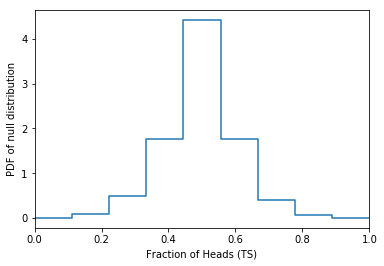

In [10]:
import matplotlib.pyplot as plt

#Now let's plot the PDF
hist, bins = np.histogram(fair_results, bins = np.linspace(0,1,10), density=True)
print(bins)

#remember to set density=True for a PDF (integral must be 1)!
#np.histogram returns bin edges :-/
hist = np.concatenate([hist,[0.]])
plt.plot(bins, hist, drawstyle='steps-post')
plt.xlabel('Fraction of Heads (TS)')
plt.ylabel('PDF of null distribution')
plt.xlim(0,1)
plt.show()

Great! So we've shown that we can use the fraction of heads in 1000 coin flips as a test statistic, since we've calculated the PDF under the null hypothesis. 

## 4. Select a significance level at which the null hypothesis will be rejected

### Type I and Type II Errors
Since in testing our hypothesis, we have two options for our result (accept/reject the null hypothesis), and there are two options for the "actual" state of our null hypothesis (either it is true or it isn't), there are four possible outcomes describing whether we were correct or not. 

|*           |$H_o$ rejected                 |Accept (Fail to reject) $H_o$       |
|------------|-------------------------------|------------------------------------|
|$H_o$ False |Correct                        |Type II error (false negative)      |
|$H_o$ True  |Type I error (false positive)  |Correct                             |

If you reject a true null hypothesis, then this is a type II error. If you accept a false null hypothesis, then this is a type I error. "Type I" and "type II" are needlessly confusing names, so let's instead refer to these with the more intuitive names "false positive" and "false negative". 

For our coin flip example, if we reject the null hypothesis and state that the coin is unfair, but the coin was actually fair, then we got a _false positive_. 

If we were to accept the null hypthesis and state that the coin was fair, but the coin was actually unfair, then we got a _false negative_. 

Both types of errors are bound to happen sometimes, but we're typically more concerned with false positives: We don't want to make any claims of discovery when in fact it was simply a background fluctuation. We can control the rate at which this happens with the _significance_ of the test ($\alpha$). The _significance_ refers to the probability of obtaining a false positive. 

Given a hypothesis test with some test statistic (where we can calculate the distribution of this test statistic under the null hypothesis, see above!), we can divide the range of our test statistic into the _acceptance region_, and the _rejection region_. If our observed test statistic falls in the _acceptance region_, we will accept the null hypothesis to be true. If our observed test statistic falls into the _rejection region_, we will reject the null hypothesis. 

The probability of a false positive is then simply the integral of our null hypothesis test statistic distribution over the rejection region. This is the _significance_ of the test. In principle, we can set the significance of our test to be whatever we want, simply by changing the acceptance and rejection regions. In practice, we typically want to set a high bar for announcing a result (this corresponds to a _low_ significance). In particle physics, the threshold for rejecting the null hypothesis is typically set such that the significance is $2.87 \times 10 ^{-7}$ (the _one-sided five sigma threshold_). In other disciplines, the convention is different, with social scientists and biologists typically rejecting the null hypothesis at the $.01$ or $.05$ significance level. 

You might sometimes hear significance refered to in units of "sigma" (e.g. "$5 \sigma$" or "$3 \sigma$"). This can be obtained by the process shown in the figure below, by mapping the significance to a normal distribution. 

<img src="fig1.png" style="width: 500px;">

For our coin flip example, let's pretend to be social scientists and set our significance to be 0.1. We will be able to reject our null hypothesis at the 10% significance level. 

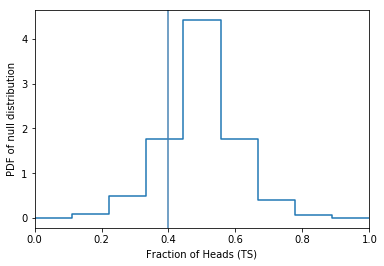

In [11]:
def get_thresh(bgdata, sig=.1):
    #figure out the .1 significance threshold on our TS
    bgdata = sorted(bgdata)
    bgdata = np.array(bgdata)
    for val in bgdata:
        integral = float(len(bgdata[bgdata<val]))/len(bgdata)
        if integral > sig:
            lowerbound = val
            break
    return lowerbound

lowerbound = get_thresh(fair_results, sig=0.1)
#replot our pdf
plt.plot(bins, hist, drawstyle='steps-post')
plt.xlabel('Fraction of Heads (TS)')
plt.ylabel('PDF of null distribution')

#Plot the 5% significance thresholds as vertical lines.
#This defines our acceptance region
#If our observed TS value isn't above the vertical line, we can reject H0 at the 5% significance level. 
plt.axvline(lowerbound, color='steelblue')
plt.xlim(0,1)

plt.show()

## 5. Compute the observed TS from data

Now that we've defined our set of hypotheses, a test statistic, and a significance level at which we plan to be able to reject the null hypothesis, let's actually compute a TS for some observed data. 

In [13]:
#use our functions to simulate some data
obsdata = []
for i in range(0,20):
    oneflip = flip_coin(pheads=.5)
    obsdata.append(oneflip)
    
#...or actually flip a coin yourself! I used a biased coin for this data
obsdata = ['H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'H', 'T']
obsdata = np.array(obsdata)
fracheads = len(obsdata[obsdata=='H'])/float(len(obsdata))
print("observed data array:", obsdata)
print("observed test statistic:", fracheads)

('observed data array:', array(['H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'H', 'H', 'H',
       'T', 'T', 'T', 'T', 'T', 'H', 'T'], dtype='|S1'))
('observed test statistic:', 0.3)


## 6. Decide whether to accept/reject the null hypothesis

Let's see where this observed test statistic lies relative to the bounds we set up in step 4:

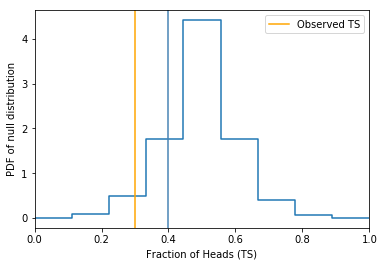

In [14]:
#replot our pdf
plt.plot(bins, hist, drawstyle='steps-post')
plt.xlabel('Fraction of Heads (TS)')
plt.ylabel('PDF of null distribution')

#Plot the 5% significance thresholds as vertical lines.
#If our observed TS value isn't between these vertical lines, we can reject H0 at the 5% significance level. 
plt.axvline(lowerbound, color='steelblue')
plt.axvline(fracheads, color='orange', label='Observed TS')
plt.xlim(0, 1)
plt.legend(loc=0)

plt.show()

Since our observed TS was not within our acceptance region, we can reject the null hypothesis at the 5% level. 
(If you got that the TS was in the acceptance region, then you would instead fail to reject the null hypothesis)

### p-values

An alternative way of doing this construction involves the calculation of a _p-value_. A _p-value_ is the probability, under the null hypothesis, of obtaining a test statistic at least as extreme as the one we have observed from data. If our p-value is smaller than our significance, then we can reject the null hypothesis.  The p-value can be calculated by simply integrating our null hypothesis test statistic distribution. For the one-tailed case (above), this is: 

p-value = $\int_0^{TS_{obs}} PDF_{H_o}$

In [15]:
def get_p_value(obsval, bgdata):
    #calculate a 1 sided p-value for an observed value and a background distribution
    bgdata = np.array(bgdata)
    lowertail = float(len(bgdata[bgdata<obsval]))/len(bgdata)
    return lowertail
    
print("one-tailed p-value:", get_p_value(fracheads, fair_results))

('one-tailed p-value:', 0.024)


Since the p-value I got is less than our pre-determined significance, I will reject the null hypothesis ($P(heads)=1/2$) in favor of the alternative hypothesis ($P(heads)<1/2$)

## Addendum: 1 vs. 2 tailed tests

In the above coin flip example, we used a _one-tailed_ test because we originally set up our alternative hypothesis to be one-tailed: We're only testing to see if $P(heads)<1/2$, if $P(heads)>1/2$, we still can't reject the null hypothesis. 

We could have instead set up our hypothesis to be _two-tailed_:

- $H_o$: The coin is fair, $P(heads)=1/2$

- $H_a$: The coin is not fair, $P(heads) \neq 1/2$

Where now if either $P(heads) < 1/2$ OR $P(heads) > 1/2$, we will reject the null hypothesis. The procedure is similar to that of above, but we should be careful when setting up our acceptance and rejection regions. Since our hypothesis is now two tailed, our rejection region is _also_ two tailed: If the test statistic is either below the lower bound, or above the upper bound, we can reject the null hypothesis. 

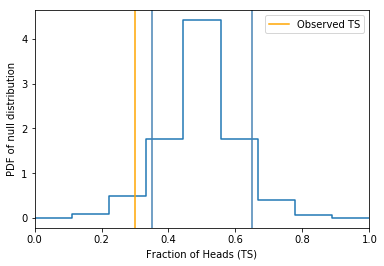

In [16]:
def get_thresh_2tail(bgdata, sig=.1):
    #figure out the .05 significance threshold on our TS
    bgdata = sorted(bgdata)
    bgdata = np.array(bgdata)
    #make sure you adjust for the fact that you are now doing a two-tailed test!
    #half the significance goes into each tail
    twotailedsig = sig/2.
    for val in bgdata:
        integral = float(len(bgdata[bgdata<val]))/len(bgdata)
        if integral > twotailedsig:
            lowerbound = val
            break
    for val in bgdata[::-1]:
        integral = float(len(bgdata[bgdata>val]))/len(bgdata)
        if integral > twotailedsig:
            upperbound = val
            break
    return lowerbound, upperbound

lowerbound_2t, upperbound_2t = get_thresh_2tail(fair_results, sig=0.1)
#replot our pdf
plt.plot(bins, hist, drawstyle='steps-post')
plt.xlabel('Fraction of Heads (TS)')
plt.ylabel('PDF of null distribution')

#Plot the 5% significance thresholds as vertical lines.
#If our observed TS value isn't between these vertical lines, we can reject H0 at the 5% significance level. 
plt.axvline(lowerbound_2t, color='steelblue')
plt.axvline(upperbound_2t, color='steelblue')
plt.axvline(fracheads, color='orange', label='Observed TS')
plt.xlim(0, 1)
plt.legend(loc=0)

plt.show()

So even if we had done the two-tailed test, we still would have concluded that the coin was unfair. Also, we should be careful to take both tails into account when calculating a p-value:

In [17]:
def get_p_value_2t(obsval, bgdata):
    #calculate a 2 sided p-value for an observed value and a background distribution
    bgdata = np.array(bgdata)
    upperval = np.median(bgdata)+abs(np.median(bgdata)-obsval)
    lowertail = float(len(bgdata[bgdata<obsval]))/len(bgdata)
    uppertail = float(len(bgdata[bgdata>upperval]))/len(bgdata)
    return lowertail + uppertail
    
print("two-tailed p-value:", get_p_value_2t(fracheads, fair_results))

('two-tailed p-value:', 0.047)


Note that our p-value for testing the two-tailed hypothesis is different from the one-tailed hypothesis. It's always important to keep track of the hypothesis that the p-value corresponds to. If we _only_ wanted to test the hypothesis that coin was biased to produce tails more often, then we should use the one-tailed test. If we instead were interested in either the case that the coin is biased in the favor of tails _or_ in favor of heads, then we should use the two-tailed test. 

## Trial Factors

Each time you obtain the answer of an analysis from real data, you have done one _experimental trial_. It is common to perform multiple trials when working with a specific analysis technique.

**Example**: In the neutrino sources group, we might test the probability that _one_ location is consistent with background expectation. If we were to apply this framework to a list of 30 source candidate locations, then this would be 30 trials.

**Example**: Repeating an analysis with new cuts. We might count the number of neutrinos with E > 1 TeV in 1 year, then count the number of neutrinos with E > 10 TeV in 1 year. This would be 2 trials. 

**Example**: Repeating with different signal hypotheses. You might look for emission from blazars using both the hypothesis of steady emission and a flare hypothesis (2 trials)

Trials can be both independent, or correlated:

**Independent**: Search for a new source/signal in 1 year of data, repeat the search in the next year of data (separately). This would be 2 independent trials

**Correlated**: Search for a new source/signal in 1 year of data, repeat the search with 2 years of data, including the first year. This would be 2 trials, but they would be correlated.

Let's go back to our coin flip example to see why trials matter.

In [19]:
#Simulate 30 trials, or ask the class to do it experimentally
#We'll go back to using a 1-tailed test here. 
print("TS", "|" ,"p-value (pre-trial)")
N_trials_pvals = []
Ntrials = 30
for i in range(0,Ntrials):
    one_trial = do_one_trial(pheads=0.5, Ncoins=20)
    print(one_trial, "|", get_p_value(one_trial, fair_results))
    N_trials_pvals.append(get_p_value(one_trial, fair_results))

('TS', '|', 'p-value (pre-trial)')
(0.45, '|', 0.26)
(0.55, '|', 0.596)
(0.4, '|', 0.135)
(0.45, '|', 0.26)
(0.4, '|', 0.135)
(0.4, '|', 0.135)
(0.55, '|', 0.596)
(0.45, '|', 0.26)
(0.4, '|', 0.135)
(0.5, '|', 0.406)
(0.45, '|', 0.26)
(0.4, '|', 0.135)
(0.35, '|', 0.065)
(0.6, '|', 0.751)
(0.8, '|', 0.993)
(0.45, '|', 0.26)
(0.65, '|', 0.873)
(0.6, '|', 0.751)
(0.55, '|', 0.596)
(0.3, '|', 0.024)
(0.4, '|', 0.135)
(0.3, '|', 0.024)
(0.5, '|', 0.406)
(0.6, '|', 0.751)
(0.5, '|', 0.406)
(0.5, '|', 0.406)
(0.45, '|', 0.26)
(0.45, '|', 0.26)
(0.5, '|', 0.406)
(0.4, '|', 0.135)


If we simulate enough trials, we'll _eventually_ obtain a p-value < 0.1, and will thus _eventually_ reject the null hypothesis, even if the null hypothesis is true. This is bad. We adjust for this with **trial factors**. Let's call the probability of seeing a result in a single trial is the "pre-trial probability" ($P_{pre}$), and the probability of seeing a result after many trials the "post-trial probability" ($P_{post}$). For N independent trials, $P_{post}$ can be written as:

$P_{post} = 1-(1-P_{pre})^N$ (The Sidak Correction)

Let's look at how this affects our results above.

In [20]:
#Find our best p-value from 30 trials. 
bestp = min(N_trials_pvals)
print("best pre-trial p-value:", bestp)

('best pre-trial p-value:', 0.024)


In [21]:
def trialcorrect(pvalue, Ntrials):
    return 1.-(1.-pvalue)**Ntrials

print("Trial corrected p-value:", trialcorrect(bestp, Ntrials))

('Trial corrected p-value:', 0.5175030970939865)


The fact that we did 30 trials had a pretty significant effect here. After trial correcting, our p-value isn't less than .1 anymore, so we can't reject the null hypothesis. This makes sense, since our trials were all generated from a fair coin. 

Suppose that one of our trials had turned up a p-value of $2.8 \times 10^{-7}$ (so a $5\sigma$ result). How might our 30 trials have affected this?

In [22]:
correctedp = trialcorrect(2.8*10**-7, Ntrials)

#What's the new significance?
import scipy.stats as stats
newsig = stats.norm.ppf(1-correctedp)

print("Trial corrected 5 sigma result:", correctedp)
print("Trial corrected significance:", newsig)

('Trial corrected 5 sigma result:', 8.399965894967387e-06)
('Trial corrected significance:', 4.303660134506316)


So our 30 independent trials bumped our result down from $5\sigma$ to $4.3\sigma$. This is still a pretty significant result! The probability of a false positive is $8.3\times10^{-6}$. This is why we choose the 5-sigma threshold in particle physics. If a result is $>5\sigma$, then we can be pretty sure we're properly rejecting the null hypothesis, even with order ~10 trials. 

In practice, we oftentimes don't have fully independent trials. A major challenge for a lot of a analyses is figuring out how to handle correlated trials in an efficient way. This is a difficult problem, and is often analysis-dependent, so we won't discuss it here. 